<a href="https://colab.research.google.com/github/febigandap/TugasIndividu_TrainDataset/blob/master/TUGAS_INDIVIDU_%22train%22_FEBI_GANDA_PUTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALASI SPARK PADA GOOGLE COLAB**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [22]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

**IMPORT LIBRARY SPARK YANG SUDAH DIINSTALL**

In [4]:
import findspark
findspark.init("spark-2.4.5-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [5]:
!pip install -q pyspark_dist_explore

In [6]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist


**INISIALISASI SPARK CONTEXT DAN SPARK SESSION**

In [7]:
sc = spark.sparkContext
spark = SparkSession(sc)

**LOAD DATASET**

In [23]:
train_df = spark.read.csv("Train.csv", header=True, inferSchema=True)
train_df.printSchema()            #mengecek schema dari dataset

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

**PROSES EDA**

In [24]:
print("Jumlah total penumpang kereta:")
train_df.count()

Jumlah total penumpang kereta:


103904

In [35]:
print("Jumlah penumpang pada masing-masing Class Kereta : ")
train_df.groupby("class").count().show()

Jumlah penumpang pada masing-masing Class Kereta : 
+--------+-----+
|   class|count|
+--------+-----+
|Eco Plus| 7494|
|Business|49665|
|     Eco|46745|
+--------+-----+



In [36]:
train_df.select('Age').describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|            103904|
|   mean|39.379706267323684|
| stddev|15.114963699737805|
|    min|                 7|
|    max|                85|
+-------+------------------+



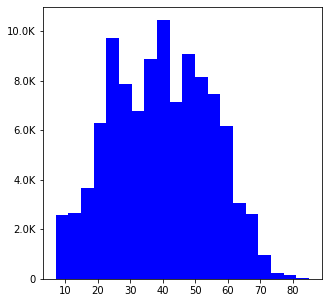

In [38]:
train_df_age = train_df.select('Age')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, train_df_age, bins=20, color="blue")
plt.show()